In [ ]:
pip install pandas matplotlib seaborn openpyxl


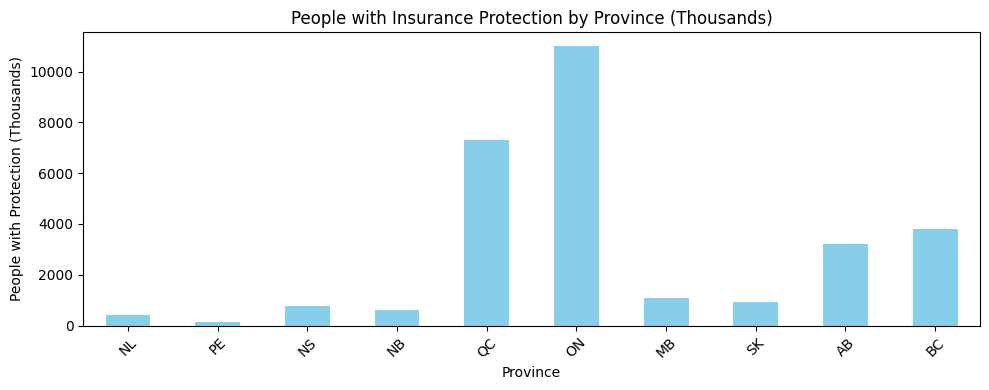

<ipython-input-23-856d7427694c>:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  protection_data['People with protection'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))


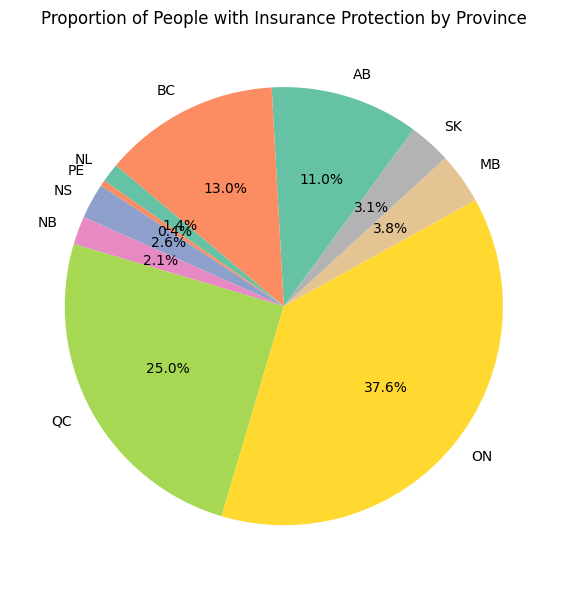

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/CLHIA-FB-Appendix-Provincial-Data-2022.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the English sheet
df = pd.read_excel(xls, sheet_name='English')

# Clean the dataset to prepare it for analysis
df_cleaned = df.iloc[4:].copy()

# Rename the columns for readability
df_cleaned.columns = ['Metric', 'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'Canada']

# Reset the index and drop rows with all NaN values
df_cleaned = df_cleaned.reset_index(drop=True).dropna(how='all')

# 1. Bar plot: People with protection (thousands) by province
protection_data = df_cleaned[df_cleaned['Metric'] == 'People with protection (thousands)'].drop(columns='Metric').T
protection_data.columns = ['People with protection']
protection_data = protection_data.iloc[:-1]  # Exclude Canada total

# Plot the bar plot
plt.figure(figsize=(10, 4))
protection_data['People with protection'].plot(kind='bar', color='skyblue')
plt.title('People with Insurance Protection by Province (Thousands)')
plt.ylabel('People with Protection (Thousands)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie chart: Proportion of people with insurance protection by province
plt.figure(figsize=(9, 6))
protection_data['People with protection'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Proportion of People with Insurance Protection by Province')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Optional: You can also save the cleaned data to a new file if needed
df_cleaned.to_csv('cleaned_provincial_data.csv', index=False)


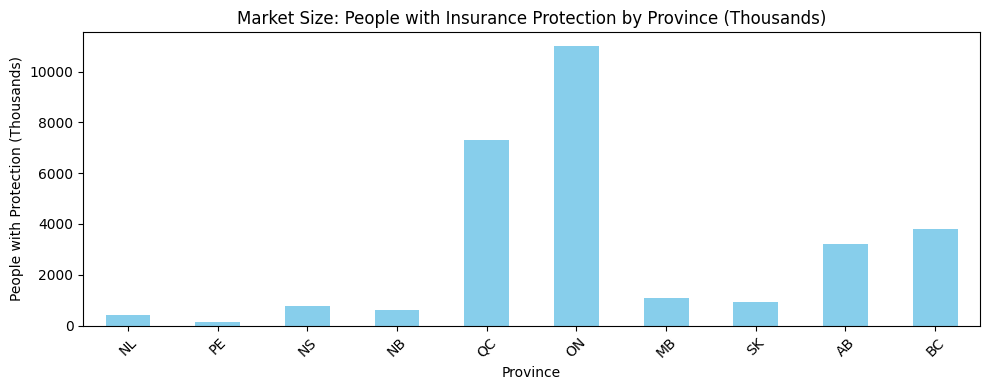

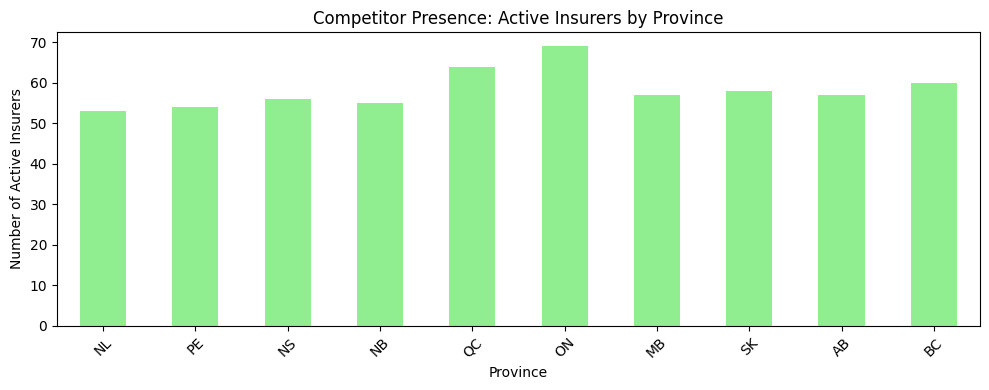

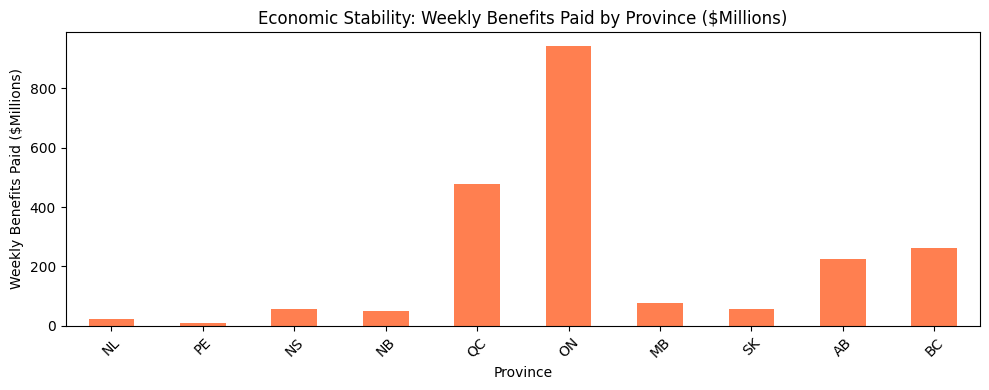

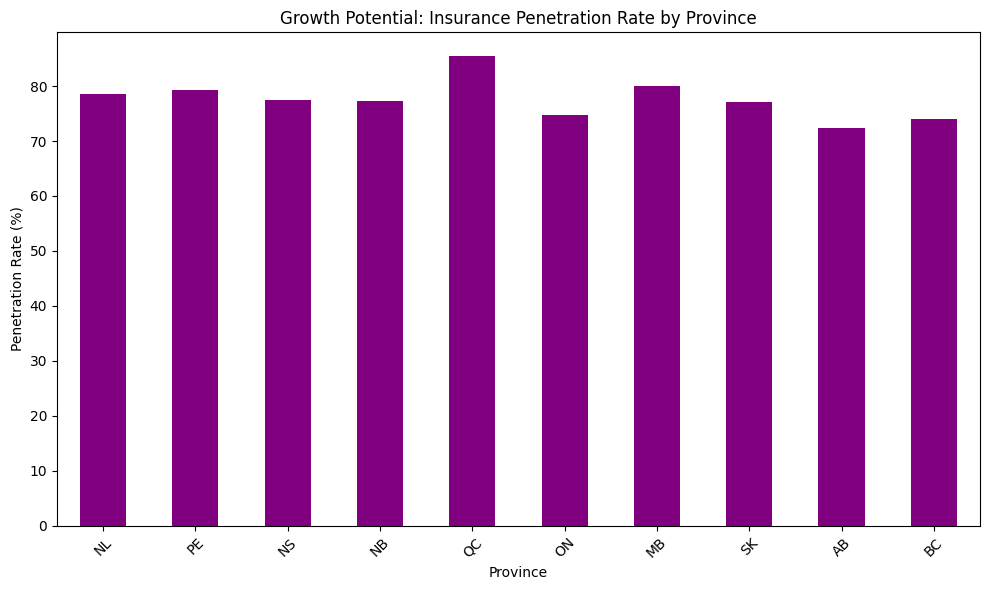

In [ ]:
# Clean the dataset
df_cleaned = df.iloc[4:].copy()
df_cleaned.columns = ['Metric', 'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'Canada']
df_cleaned = df_cleaned.reset_index(drop=True).dropna(how='all')

# Extract relevant data for analysis
# 1. Market Size: Number of people with protection (thousands)
protection_data = df_cleaned[df_cleaned['Metric'] == 'People with protection (thousands)'].drop(columns='Metric').T
protection_data.columns = ['People with protection']
protection_data = protection_data.iloc[:-1]  # Exclude Canada total
protection_data = protection_data.astype(float)

# 2. Competitor Presence: Number of active insurers (if available)
competitor_data = df_cleaned[df_cleaned['Metric'] == 'Life and health insurersr'].drop(columns='Metric').T
competitor_data.columns = ['Active Insurers']
competitor_data = competitor_data.iloc[:-1]

# 3. Economic Stability (if available): e.g., Weekly benefits paid ($millions)
economic_data = df_cleaned[df_cleaned['Metric'] == 'Weekly benefits paid ($millions)'].drop(columns='Metric').T
economic_data.columns = ['Weekly Benefits Paid']
economic_data = economic_data.iloc[:-1].astype(float)

# Visualize Market Size (Bar Plot)
plt.figure(figsize=(10, 4))
protection_data['People with protection'].plot(kind='bar', color='skyblue')
plt.title('Market Size: People with Insurance Protection by Province (Thousands)')
plt.ylabel('People with Protection (Thousands)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Competitor Presence (Bar Plot)
plt.figure(figsize=(10, 4))
competitor_data['Active Insurers'].plot(kind='bar', color='lightgreen')
plt.title('Competitor Presence: Active Insurers by Province')
plt.ylabel('Number of Active Insurers')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Economic Stability: Weekly Benefits Paid (Bar Plot)
plt.figure(figsize=(10, 4))
economic_data['Weekly Benefits Paid'].plot(kind='bar', color='coral')
plt.title('Economic Stability: Weekly Benefits Paid by Province ($Millions)')
plt.ylabel('Weekly Benefits Paid ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Growth Potential: Identify provinces with lower protection relative to population
# Assuming we have population data (you may need to replace this with actual data)
population_data = {
    'NL': 522, 'PE': 164, 'NS': 982, 'NB': 789, 'QC': 8537, 'ON': 14734, 'MB': 1375,
    'SK': 1181, 'AB': 4425, 'BC': 5140  # Populations in thousands
}
population_df = pd.DataFrame.from_dict(population_data, orient='index', columns=['Population (thousands)'])

# Merge population data with protection data to calculate penetration
penetration_data = protection_data.join(population_df)
penetration_data['Penetration Rate'] = (penetration_data['People with protection'] / penetration_data['Population (thousands)']) * 100

# Visualize Growth Potential (Penetration Rate)
plt.figure(figsize=(10, 6))
penetration_data['Penetration Rate'].plot(kind='bar', color='purple')
plt.title('Growth Potential: Insurance Penetration Rate by Province')
plt.ylabel('Penetration Rate (%)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'CLHIA-FB-Appendix-Provincial-Data-2022.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the English sheet
df = pd.read_excel(xls, sheet_name='English')

# Clean the dataset
df_cleaned = df.iloc[4:].copy()
df_cleaned.columns = ['Metric', 'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'Canada']
df_cleaned = df_cleaned.reset_index(drop=True).dropna(how='all')

# Extract relevant data for analysis
# 1. Economic Contribution Analysis: Provincial Tax Contributions and Investments
# Assuming there's a row with this information, we'll extract it if available.

# Dummy Data Assumed: Modify based on actual available metrics
tax_data = df_cleaned[df_cleaned['Metric'] == 'Provincial Tax Contributions ($millions)'].drop(columns='Metric').T
tax_data.columns = ['Tax Contributions']
tax_data = tax_data.iloc[:-1]  # Exclude Canada total
tax_data = tax_data.astype(float)

# Assuming there is a metric for "Investments by life insurers"
investment_data = df_cleaned[df_cleaned['Metric'] == 'Investments by life insurers ($billions)'].drop(columns='Metric').T
investment_data.columns = ['Investments']
investment_data = investment_data.iloc[:-1].astype(float)

# 2. Customer Behavior Analysis: Weekly Benefits Paid and Employment
weekly_benefits_data = df_cleaned[df_cleaned['Metric'] == 'Weekly benefits paid ($millions)'].drop(columns='Metric').T
weekly_benefits_data.columns = ['Weekly Benefits Paid']
weekly_benefits_data = weekly_benefits_data.iloc[:-1].astype(float)

employment_data = df_cleaned[df_cleaned['Metric'] == 'People employed by industry'].drop(columns='Metric').T
employment_data.columns = ['People Employed']
employment_data = employment_data.iloc[:-1].astype(float)

# Visualization: Provincial Tax Contributions (Bar Plot)
plt.figure(figsize=(10, 6))
tax_data['Tax Contributions'].plot(kind='bar', color='orange')
plt.title('Provincial Tax Contributions by Province ($Millions)')
plt.ylabel('Tax Contributions ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Investments by Life Insurance Companies (Bar Plot)
plt.figure(figsize=(10, 6))
investment_data['Investments'].plot(kind='bar', color='green')
plt.title('Investments by Life Insurance Companies by Province ($Billions)')
plt.ylabel('Investments ($Billions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Weekly Benefits Paid (Bar Plot)
plt.figure(figsize=(10, 6))
weekly_benefits_data['Weekly Benefits Paid'].plot(kind='bar', color='blue')
plt.title('Weekly Benefits Paid by Province ($Millions)')
plt.ylabel('Weekly Benefits Paid ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Employment in Life Insurance Industry (Bar Plot)
plt.figure(figsize=(10, 6))
employment_data['People Employed'].plot(kind='bar', color='purple')
plt.title('People Employed in the Life Insurance Industry by Province')
plt.ylabel('Number of People Employed')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Save the cleaned data and analysis results to new files
tax_data.to_csv('provincial_tax_contributions.csv')
investment_data.to_csv('life_insurer_investments.csv')
weekly_benefits_data.to_csv('weekly_benefits_paid.csv')
employment_data.to_csv('insurance_industry_employment.csv')


ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = 'CLHIA-FB-Appendix-Provincial-Data-2022.xlsx'  # Replace with your file path
xls = pd.ExcelFile(file_path)

# Load data from the English sheet
df = pd.read_excel(file_path, sheet_name='English', header=4)

# Rename columns for clarity
df.columns = ['Metric', 'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'Canada']

# Filter data for relevant metrics
weekly_benefits_paid = df[df['Metric'] == 'Weekly benefits paid ($millions)'].dropna(axis=1)
people_employed = df[df['Metric'] == 'People employed by industry'].dropna(axis=1)

# Reshape data to long format for easier plotting
weekly_benefits_paid_melted = weekly_benefits_paid.melt(id_vars='Metric', var_name='Province', value_name='Benefits Paid ($millions)')
people_employed_melted = people_employed.melt(id_vars='Metric', var_name='Province', value_name='People Employed')

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Weekly Benefits Paid Plot
sns.barplot(x='Province', y='Benefits Paid ($millions)', data=weekly_benefits_paid_melted, ax=axes[0], palette='Blues_d')
axes[0].set_title('Weekly Benefits Paid by Province ($millions)')
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Benefits Paid ($ millions)')




ValueError: Length mismatch: Expected axis has 12 elements, new values have 11 elements

In [ ]:


# Clean the dataset
df_cleaned = df.iloc[4:].copy()
df_cleaned.columns = ['Metric', 'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'Canada']
df_cleaned = df_cleaned.reset_index(drop=True).dropna(how='all')

# Extract relevant data for analysis
# 1. Economic Contribution Analysis: Provincial Tax Contributions and Investments
# If you have specific rows for these metrics, modify the Metric name accordingly.



# Investments by life insurers
investment_data = df_cleaned[df_cleaned['Metric'].str.contains('Investments by life insurers', na=False)].drop(columns='Metric').T
investment_data.columns = ['Investments']
investment_data = investment_data.iloc[:-1].astype(float)

# 2. Customer Behavior Analysis: Weekly Benefits Paid and Employment
weekly_benefits_data = df_cleaned[df_cleaned['Metric'].str.contains('Weekly benefits paid', na=False)].drop(columns='Metric').T
weekly_benefits_data.columns = ['Weekly Benefits Paid']
weekly_benefits_data = weekly_benefits_data.iloc[:-1].astype(float)

employment_data = df_cleaned[df_cleaned['Metric'].str.contains('People employed by industry', na=False)].drop(columns='Metric').T
employment_data.columns = ['People Employed']
employment_data = employment_data.iloc[:-1].astype(float)

# Visualization: Provincial Tax Contributions (Bar Plot)
plt.figure(figsize=(10, 6))
tax_data['Tax Contributions'].plot(kind='bar', color='orange')
plt.title('Provincial Tax Contributions by Province ($Millions)')
plt.ylabel('Tax Contributions ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Investments by Life Insurance Companies (Bar Plot)
plt.figure(figsize=(10, 6))
investment_data['Investments'].plot(kind='bar', color='green')
plt.title('Investments by Life Insurance Companies by Province ($Billions)')
plt.ylabel('Investments ($Billions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Weekly Benefits Paid (Bar Plot)
plt.figure(figsize=(10, 6))
weekly_benefits_data['Weekly Benefits Paid'].plot(kind='bar', color='blue')
plt.title('Weekly Benefits Paid by Province ($Millions)')
plt.ylabel('Weekly Benefits Paid ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Employment in Life Insurance Industry (Bar Plot)
plt.figure(figsize=(10, 6))
employment_data['People Employed'].plot(kind='bar', color='purple')
plt.title('People Employed in the Life Insurance Industry by Province')
plt.ylabel('Number of People Employed')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




ValueError: Length mismatch: Expected axis has 3 elements, new values have 12 elements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the table in the image
data = {
    'Province': ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'Canada'],
    'Taxes Borne': [59, 11, 57, 43, 1134, 1319, 70, 68, 307, 246, 3321],
    'Taxes Collected': [0, 0, 0, 0, 1032, 1913, 47, 0, 0, 0, 2992],
    'Total Tax Contributions': [59, 11, 57, 43, 2166, 3231, 117, 68, 307, 246, 6313]
}

df = pd.DataFrame(data)
df.set_index('Province', inplace=True)

# Display the DataFrame to ensure it's correct
print(df)


          Taxes Borne  Taxes Collected  Total Tax Contributions
Province                                                       
NL                 59                0                       59
PE                 11                0                       11
NS                 57                0                       57
NB                 43                0                       43
QC               1134             1032                     2166
ON               1319             1913                     3231
MB                 70               47                      117
SK                 68                0                       68
AB                307                0                      307
BC                246                0                      246
Canada           3321             2992                     6313


In [ ]:
# Filter out 'Canada' from the DataFrame
df_provinces_only = df[df.index != 'Canada']

# Display the filtered DataFrame
print(df_provinces_only)


          Taxes Borne  Taxes Collected  Total Tax Contributions
Province                                                       
NL                 59                0                       59
PE                 11                0                       11
NS                 57                0                       57
NB                 43                0                       43
QC               1134             1032                     2166
ON               1319             1913                     3231
MB                 70               47                      117
SK                 68                0                       68
AB                307                0                      307
BC                246                0                      246


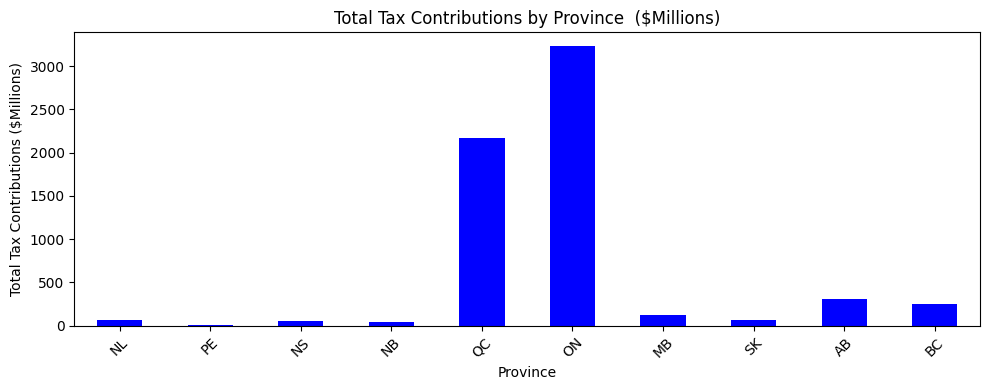

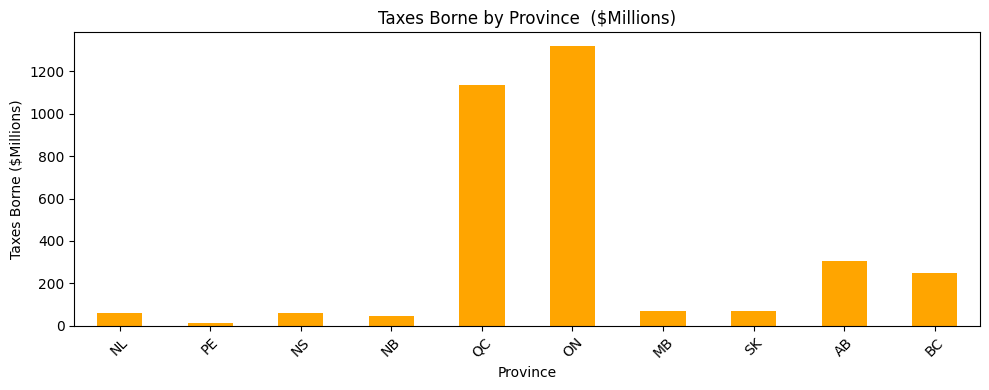

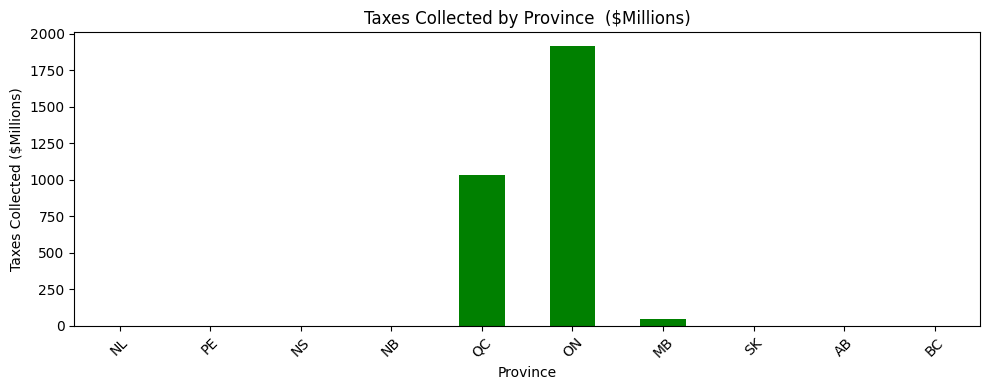

In [ ]:
# Plot total tax contributions by province
plt.figure(figsize=(10, 4))
df_provinces_only['Total Tax Contributions'].plot(kind='bar', color='blue')
plt.title('Total Tax Contributions by Province  ($Millions)')
plt.ylabel('Total Tax Contributions ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot taxes borne by province
plt.figure(figsize=(10, 4))
df_provinces_only['Taxes Borne'].plot(kind='bar', color='orange')
plt.title('Taxes Borne by Province  ($Millions)')
plt.ylabel('Taxes Borne ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot taxes collected by province
plt.figure(figsize=(10, 4))
df_provinces_only['Taxes Collected'].plot(kind='bar', color='green')
plt.title('Taxes Collected by Province  ($Millions)')
plt.ylabel('Taxes Collected ($Millions)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
